# Definición del problema a resolver
• ¿Cuál es el problema?

• Acción que buscamos hacer para solucionar el problema

• ¿Cuáles son las variables disponibles?

• ¿En qué momento se va a implantar el modelo? ¿Qué variables hay disponibles en
el momento de llamada al modelo?

• ¿Cómo se va a validar el modelo?


Aquí hay que redactar una introducción explicando el caso y toda la parafernalia...

# Exploración general / inicial
• Dimensiones de la tabla y variables

• Analizar si las variables estarán disponibles en el momento de la llamada al modelo
(sino se estaría introduciendo información a futuro en el modelo)

• Exploración de la variable objetivo

• Rápido análisis de valores nulos

• Se explora el número de variables numéricas y categóricas y se decide qué proceso
realizar para tratarlas

• Transformaciones iniciales de algunas variables: formato de fechas, eliminar
espacios de una variable string, etc

• Analizar la variable objetivo: aislándola de las demás variables (quizás, a pesar de
no tener en cuenta las variables tenemos que sacar un 80% de accuracy.

In [34]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns

In [35]:
df = pd.read_csv("../data/NCDB_1999_to_2014.csv")

C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


array(['UU', 'QQ', '01', '02', '03', '05', '04', '06', '08', '07', '09',
       '10'], dtype=object)

In [36]:
print("El dataset está compuesto por", len(df.index), "filas")
print("El dataset tiene", len(df.columns), "columnas / variables")
df.head(5)


El dataset está compuesto por 5860405 filas
El dataset tiene 22 columnas / variables


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


In [37]:
# Cambio de nombre de las variables
new_names = ["year", "month", "weekday", "hour", "fatality", "vehicles_involved", "crash_type", "crash_place", "crash_weather",
"surface_state", "road_slope", "traffic_state", "vehicle_id", "vehicle_type", "vehicle_year", "passenger_id", "passenger_sex",
"passenger_age", "passenger_role", "passenger_fatality", "passenger_safety", "passenger_type"]

print(len(new_names) == len(df.columns))

df.columns = new_names

True


In [38]:
df.dtypes

year                   int64
month                 object
weekday               object
hour                  object
fatality               int64
vehicles_involved     object
crash_type            object
crash_place           object
crash_weather         object
surface_state         object
road_slope            object
traffic_state         object
vehicle_id            object
vehicle_type          object
vehicle_year          object
passenger_id          object
passenger_sex         object
passenger_age         object
passenger_role        object
passenger_fatality    object
passenger_safety      object
passenger_type        object
dtype: object

In [39]:
# Cambio de la variable vehicle_year a años de antigüedad (la he metido en otra columna por el momento)
df['vehicle_age'] = df.year - pd.to_numeric(df.vehicle_year, errors= "coerce")

# En progreso (ignorar)

[1 2 3 4 5 6 7 8 9 10 11 12 '12' nan '01' '02' '11']
El porcentaje de fatalities/accidente para el mes 1 es del 1.506 %
El porcentaje de fatalities/accidente para el mes 2 es del 1.501 %
El porcentaje de fatalities/accidente para el mes 3 es del 1.56 %
El porcentaje de fatalities/accidente para el mes 4 es del 1.576 %
El porcentaje de fatalities/accidente para el mes 5 es del 1.641 %
El porcentaje de fatalities/accidente para el mes 6 es del 1.658 %
El porcentaje de fatalities/accidente para el mes 7 es del 1.91 %
El porcentaje de fatalities/accidente para el mes 8 es del 1.903 %
El porcentaje de fatalities/accidente para el mes 9 es del 1.771 %
El porcentaje de fatalities/accidente para el mes 10 es del 1.71 %
El porcentaje de fatalities/accidente para el mes 11 es del 1.66 %
El porcentaje de fatalities/accidente para el mes 12 es del 1.688 %
[1 2 3 4 5 6 7 '7' nan '1' '2' '3' '4' '5' '6']
[1 2 3 4 5 6 7 0]
El porcentaje de fatalities/accidente para el día de la semana 1 es del 1.543 

,index,missing_value,feature_type
1,hour,0,int8
3,month,0,int8
4,weekday,0,int8
0,year,0,int64
2,fatality,0,int64
5,passenger_id,16,object
6,vehicles_involved,343,object
7,vehicle_id,432,object
8,vehicle_type,29262,object
9,passenger_role,57342,object


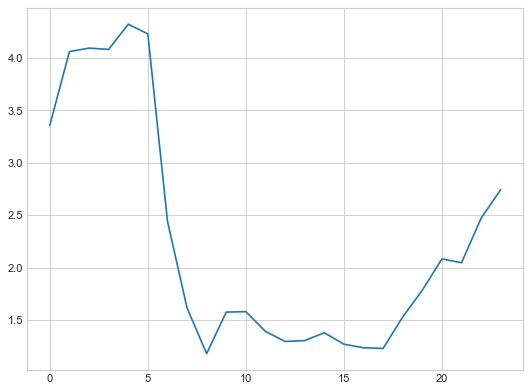

In [41]:
# en progreso
# Limpieza de valores U, UU y UUUU (son NA "puros" según el diccionario)
df = df.replace({"U": np.nan, "UU": np.nan, "UUUU": np.nan})
new_columns = list(df.columns[0:4]) + list(df.columns[5:]) + list(df.columns[4:5])

df = df[new_columns]
# Columna MONTH
print(df["month"].unique())
df["month"] = np.int8(df["month"].replace({"01": 1, "02": 2, "11": 11, "12" : 12}))
df = df[df["month"] != 0]
df["month"].unique()
month_analysis = df.groupby(["month", "fatality"]).size()

for i in range(1, 1+ np.int8(len(month_analysis)/2)):
    print("El porcentaje de fatalities/accidente para el mes",
    i ,"es del",round(month_analysis[i][1]/month_analysis[i].sum()*100, 3), "%")
month_analysis[2]
### Dividiremos la variable month en cuatro valores distintos, representando los distintos trimestres del año (Q1-4).
#### La razón para esto es la existencia de un patrón estacional en el que los distintos trimestres (o estaciones del año) tienen valores similares a la hora de relacionarse con la variable objetivo $fatality$
# df["month"] = df["month"].replace({1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4})
## Columna Weekday
print(df["weekday"].unique())
df["weekday"] = np.int8(df["weekday"].replace({"7": 7, "1": 1, "2": 2, "3" : 3, "4":4, "5":5, "6":6}))
print(df["weekday"].unique())
#Las filas con NA en weekday (valor 0 para el día de la semana) son un número mínimo en comparación con el tamaño del data-set así que nos deshacemos de ellas
# Nos deshacemos de esas filas
df = df[df["weekday"] != 0]
weekday_analysis = df.groupby(["weekday", "fatality"]).size()

for i in range(1, 1+ np.int8(len(weekday_analysis)/2)):
    print("El porcentaje de fatalities/accidente para el día de la semana",
    i ,"es del",round(weekday_analysis[i][1]/weekday_analysis[i].sum()*100, 3), "%")
## Columna $hour$
### Opción 1: https://towardsdatascience.com/how-to-handle-cyclical-data-in-machine-learning-3e0336f7f97c
### Opción 2: Identificar distintos "tramos" de similar influencia en $fatalities$ y luego hotencodearlo. Habría que hacerlo por tramos para reducir, ya que 24 variables para la hora quizás sean demasiadas
df = df[df["hour"].notnull()]
df["hour"] = df["hour"].astype("int8")
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6), dpi=80)


hour_analysis = df.groupby(["hour", "fatality"]).size()
hour_values = list()

for i in range(0, int(len(hour_analysis)/2)):
    print("El porcentaje de fatalities/accidente para la hora",
    i ,"es del",round(hour_analysis[i][1]/hour_analysis[i].sum()*100, 3), "%")
    hour_values.append(hour_analysis[i][1]/hour_analysis[i].sum()*100)

hour_values = pd.DataFrame(hour_values)
hour_values.T.iloc[0].plot()
## Variable objetivo
# Recodeado de la variable objetivo
# Antes: 1-fatality 2-no fatality
# Después: 1-fatality 2-no fatality
df['fatality'] = df['fatality'].replace({2:0})
# He pensado en unificar las columnas de fecha pero he observado que la proporción de muertes / heridos es bastante diferente según el día de la semana (e imagino que también por la hora)

print(df.fatality.value_counts() / len(df.index) * 100)

df.loc[df["weekday"] == 6].fatality.value_counts() / len(df.loc[df["weekday"] == 6].index) * 100
# analizar nulos
df_dtypes = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

df_dtypes.sort_values(['missing_value', 'feature_type'])
#Apenas tenemos valores NA, o eso parece... Sin embargo, el dataset no utiliza espacios vacíos para representar los valores desconocidos si no caracteres como X o XX. El diccionario refleja esto.

# 1. Colisiones y Tiempo

### 1.1. Observación del periodo completo

In [42]:
df["date"] = pd.DatetimeIndex(df["year"].map(str) + "-" + df["month"].map(str))
df["fatal"] = np.where(df["fatality"]==1, 1, 0)
df["non_fatal"] = np.where(df["fatality"]==0, 1, 0)

<ipython-input-43-0ea25cf3c62c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time_collision_both = df.groupby('date')["fatal","non_fatal"].sum()


Text(0, 0.5, 'Number of deadly colissions')

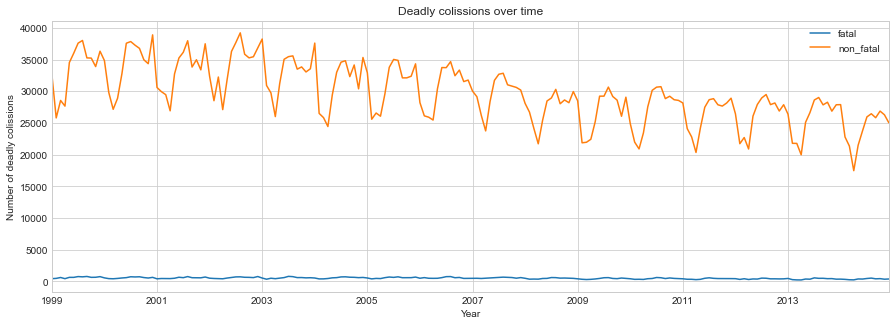

In [43]:
time_collision_both = df.groupby('date')["fatal","non_fatal"].sum()
plot = time_collision_both.plot(figsize = (15,5), title = "Deadly colissions over time")
plot.set_xlabel("Year")
plot.set_ylabel("Number of deadly colissions")

Text(0, 0.5, 'Number of deadly colissions')

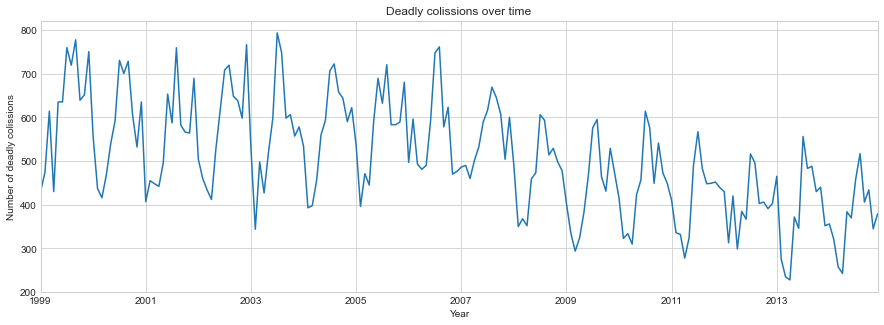

In [44]:
time_collision_fatal = df.groupby('date')["fatal"].sum()
plot = time_collision_fatal.plot(figsize = (15,5), title = "Deadly colissions over time")
plot.set_xlabel("Year")
plot.set_ylabel("Number of deadly colissions")

Text(0, 0.5, 'Number of deadly colissions')

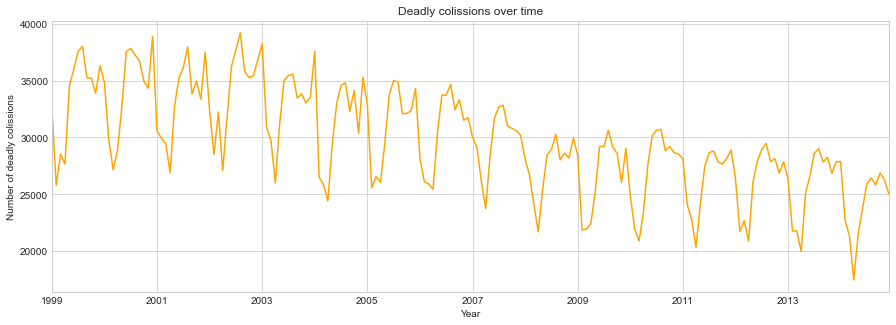

In [45]:
time_collision_nonfatal = df.groupby('date')["non_fatal"].sum()
plot = time_collision_nonfatal.plot(figsize = (15,5), title = "Deadly colissions over time", color = "orange")
plot.set_xlabel("Year")
plot.set_ylabel("Number of deadly colissions")

### 1.2. Observación reducida a los últimos 5 años

Text(0, 0.5, 'Number of deadly colissions')

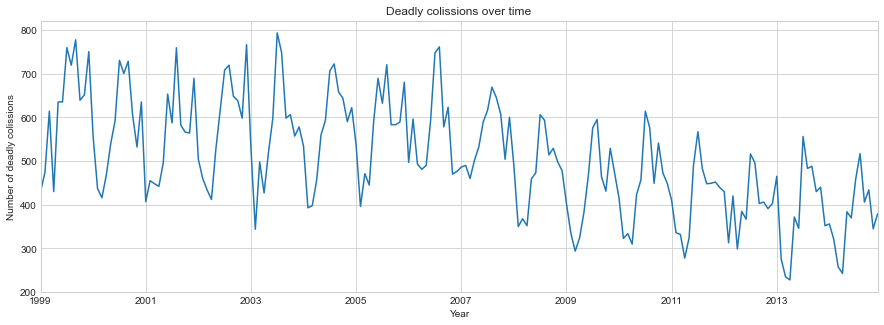

In [46]:
df_reduced = df.loc[df["date"] >= "2009"]

plot = time_collision_fatal.plot(figsize = (15,5), title = "Deadly colissions over time")
plot.set_xlabel("Year")
plot.set_ylabel("Number of deadly colissions")

Text(0, 0.5, 'Number of deadly colissions')

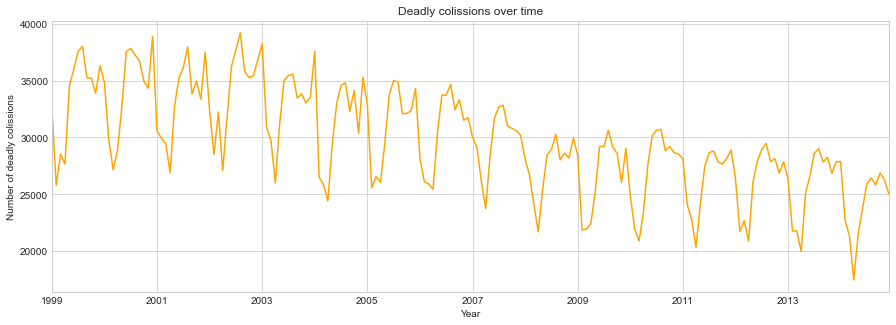

In [47]:
plot = time_collision_nonfatal.plot(figsize = (15,5), title = "Deadly colissions over time", color="orange")
plot.set_xlabel("Year")
plot.set_ylabel("Number of deadly colissions")

### 1.3 Correlación entre los valores de la variable objetivo

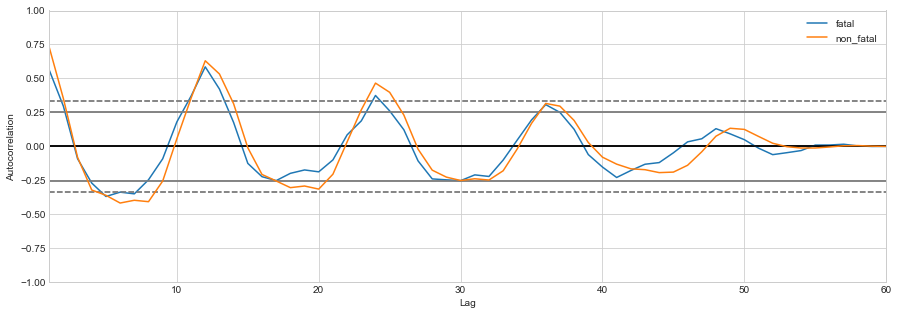

In [48]:
plt.figure(figsize=(15,5))
for c in time_collision_both.columns:
    autocorrelation_plot(time_collision_both[c][-60:],label=c);

C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


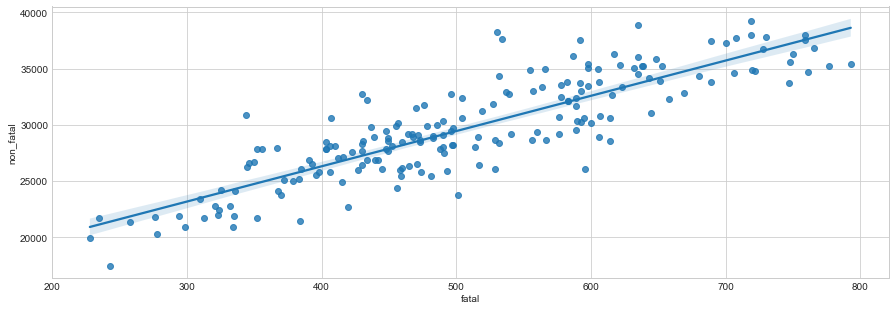

In [49]:
plt.figure(figsize=(15,5))
sns.regplot('fatal', 'non_fatal', data=time_collision_both);

In [50]:
corr = time_collision_both.corr()
print("La correlación entre los accidentes fatales y no fatales es de", str(round(corr["fatal"]["non_fatal"], 3)))
corr

La correlación entre los accidentes fatales y no fatales es de 0.861


,fatal,non_fatal
fatal,1.000000,0.861117
non_fatal,0.861117,1.000000


# 2. Análisis de los días de la semana y las horas

### 2.1. Días de la semana

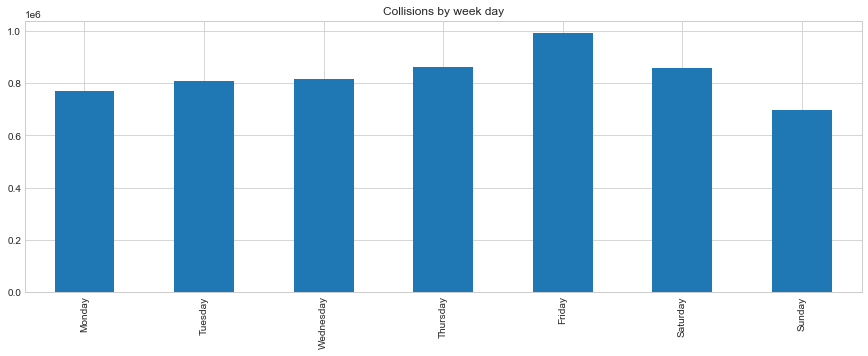

In [51]:
index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_analysis = df.groupby("weekday")["fatality"].count()
weekday_analysis.index = index
plt.figure(figsize=(15,5))
plot = weekday_analysis.plot(kind="bar", title = "Collisions by week day")

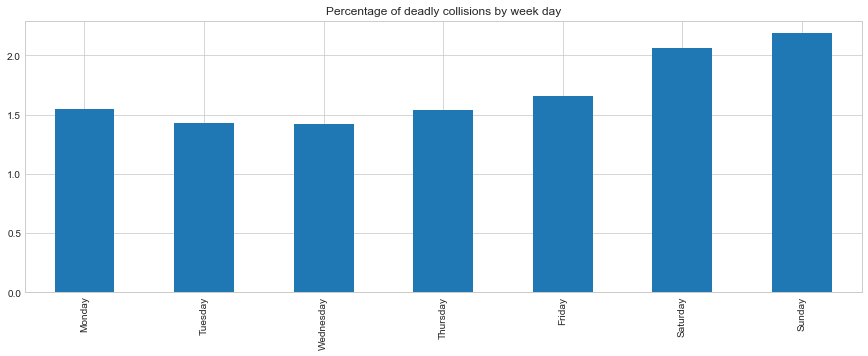

In [52]:
weekday_analysis = df.groupby(["weekday", "fatality"]).size()
serie_weekday = list()
for i in range(1, 8):
    serie_weekday.append(weekday_analysis[i][1] / weekday_analysis[i].sum() * 100)

weekday_analysis_serie = pd.Series(serie_weekday, index = index)
plt.figure(figsize=(15,5))
plot = weekday_analysis_serie.plot(kind="bar", title = "Percentage of deadly collisions by week day")

### 2.2. Horas del día

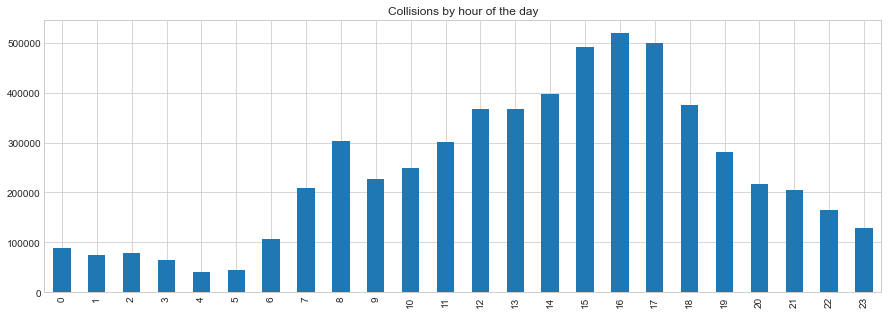

In [53]:
index = np.arange(0,24)
hour_analysis = df.groupby("hour")["fatality"].count()
hour_analysis.index = index
plt.figure(figsize=(15,5))
plot = hour_analysis.plot(kind="bar", title = "Collisions by hour of the day")

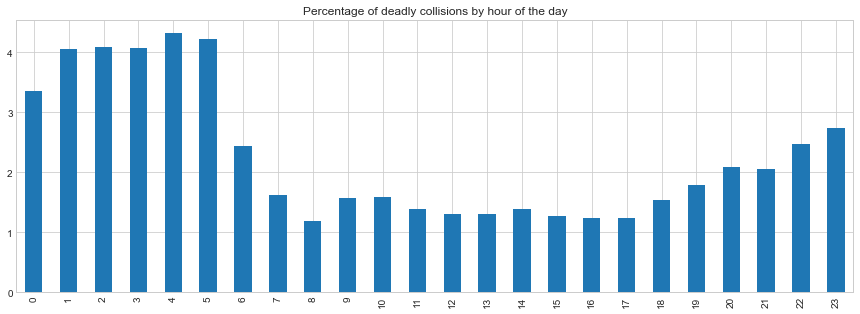

In [54]:
hour_analysis = df.groupby(["hour", "fatality"]).size()
serie_weekday = list()
for i in range(0, 24):
    serie_weekday.append(hour_analysis[i][1] / hour_analysis[i].sum() * 100)

hour_analysis = pd.Series(serie_weekday, index = index)
plt.figure(figsize=(15,5))
plot = hour_analysis.plot(kind="bar", title = "Percentage of deadly collisions by hour of the day")

# 3. Colisiones y Carretera

### 3.1. Road Configuration

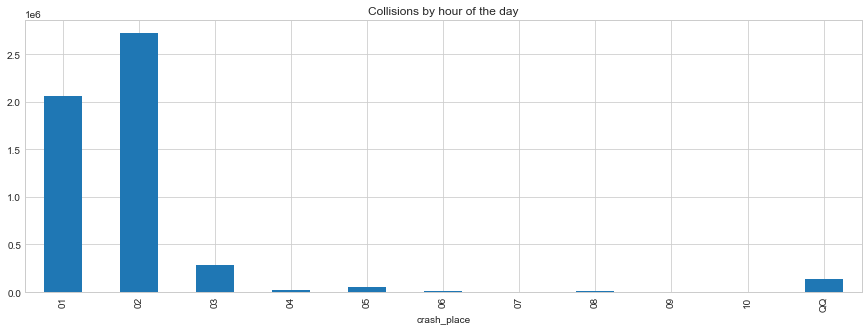

In [141]:
index = np.arange(1,12)
place_analysis = df.groupby("crash_place")["fatality"].count()
# place_analysis.index = index
plt.figure(figsize=(15,5))
plot = place_analysis.plot(kind="bar", title = "Collisions by hour of the day")

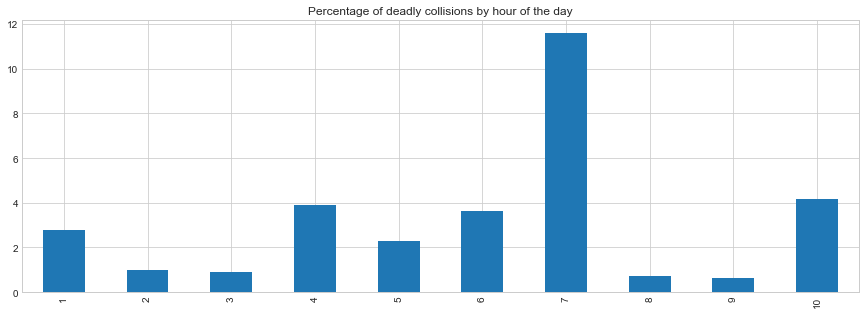

In [138]:
place_analysis = df.groupby(["crash_place", "fatality"]).size()
serie_place = list()

for i in range(0, 10):
    serie_place.append(place_analysis[:,1][i] / (place_analysis[:,1][i] +(place_analysis[:,0][i])) * 100)

place_analysis = pd.Series(serie_place, index = range(1,11))
plt.figure(figsize=(15,5))
plot = place_analysis.plot(kind="bar", title = "Percentage of deadly collisions by hour of the day")
